<a href="https://colab.research.google.com/github/willismax/MediaSystem-Python-Course/blob/main/01.Intro-Python/Python%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90%E6%87%89%E7%94%A8_%E8%82%A1%E7%A5%A8%E5%88%86%E6%9E%90%E5%85%A5%E9%96%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

本單元將嘗試抓取股票資訊來分析股票，取出歷史收盤資料畫出圖表、取得收益率(投資風險會使用到)、每天的波動。

## 用 Python pandas_datareader 抓台灣股價

- [pandas-datareader文件](https://pandas-datareader.readthedocs.io/en/latest/index.html)

回傳的格式規格

- Open     :開盤價
- High     :最高價
- Low      :最低價
- Close    :收盤價
- Volume   :交易量
- Adj Close:經過調整的收盤價

### 基本使用

In [ ]:
!pip install yfinance

In [ ]:
!pip install mplfinance

In [20]:
# 以yfinace讀取股價
import yfinance as yf
start = "2024-1-1"
end = '2024-4-13'
df = yf.download('0050.tw',start,end)

[*********************100%%**********************]  1 of 1 completed


In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,135.600006,135.949997,134.649994,134.899994,131.825928,5922076
2024-01-03,133.699997,133.899994,132.300003,132.550003,129.529495,13547475
2024-01-04,132.550003,132.750000,132.300003,132.500000,129.480637,4567593
2024-01-05,132.550003,132.949997,132.100006,132.149994,129.138596,3999671
2024-01-08,133.000000,133.600006,132.750000,132.750000,129.724930,9394720


In [23]:
import mplfinance as mpf

#繪製K線圖
mpf.plot(df, type='candle', mav=(5,20), volume=True, title='0050.TW', savefig='test_plot.png')

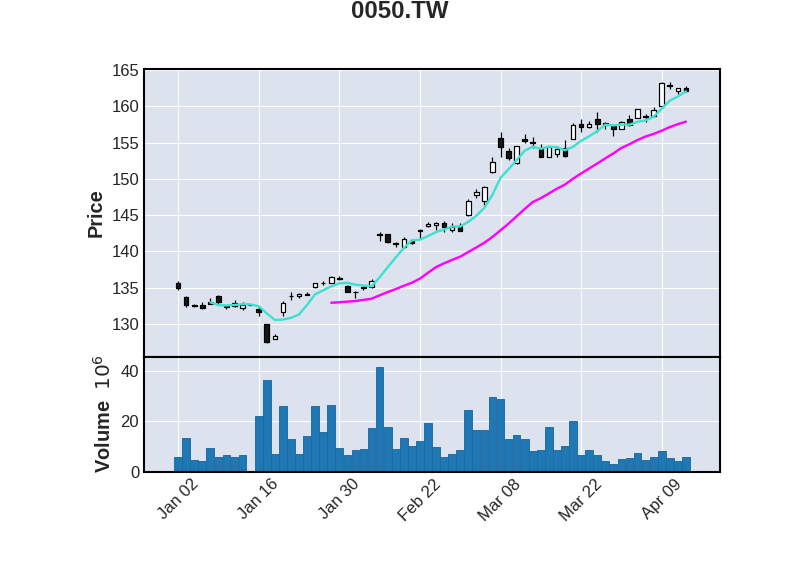

In [25]:
from IPython.display import Image

#在筆記本環境顯示圖片
Image("test_plot.png")

In [26]:
import yfinance as yf

start = "2024-1-1"
end = '2024-4-13'

# 台灣股市的話要用 股票代號 加上 .TW
df_2317 = yf.download('2317.tw',start,end)
df_2330 = yf.download('2330.tw',start,end)
df_0050 = yf.download('0050.tw',start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [27]:
df_2317.tail()
# df_2330.tail()
# df_0050.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-08,159.0,160.0,156.5,158.0,158.0,108228836
2024-04-09,158.5,161.5,155.5,158.0,158.0,101725664
2024-04-10,159.0,160.0,154.0,154.5,154.5,97698334
2024-04-11,153.0,153.5,147.0,150.0,150.0,171910054
2024-04-12,151.0,153.5,148.5,150.5,150.5,117153973


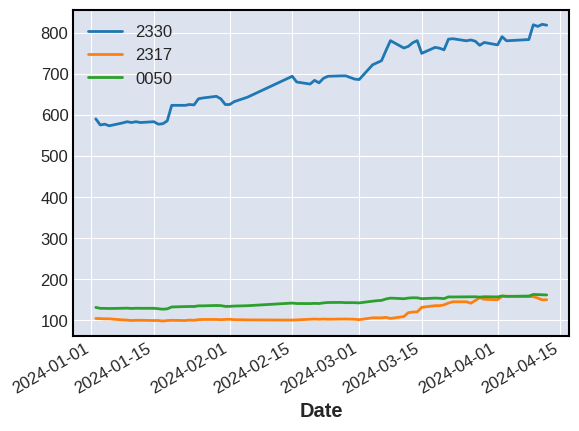

In [28]:
from matplotlib import pyplot as plt

fig = plt.figure()
df_2330['Adj Close'].plot(label="2330")
df_2317['Adj Close'].plot(label="2317")
df_0050['Adj Close'].plot(label="0050")
plt.legend()

[*********************100%%**********************]  3 of 3 completed


<Axes: xlabel='Date'>

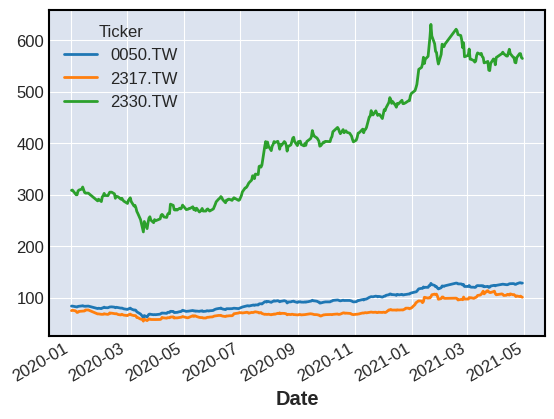

In [29]:
import datetime

# 以datetime模組示範
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 5, 3)

# 以list一次查詢多筆
df = yf.download(['2330.TW', '0050.TW', '2317.TW'], start=start, end=end)
df['Adj Close'].plot()

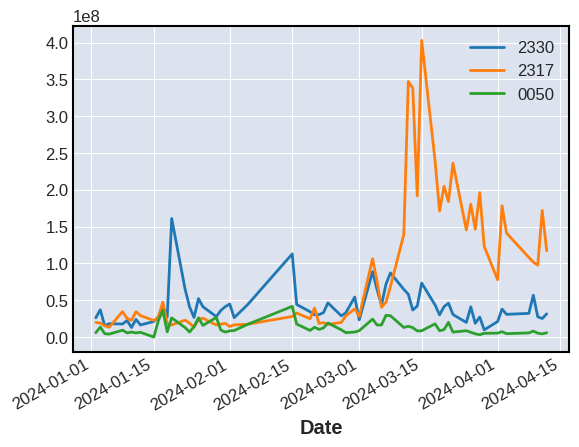

In [36]:
#交易量
fig = plt.figure()
df_2330['Volume'].plot(label="2330")
df_2317['Volume'].plot(label="2317")
df_0050['Volume'].plot(label="0050")

plt.legend()

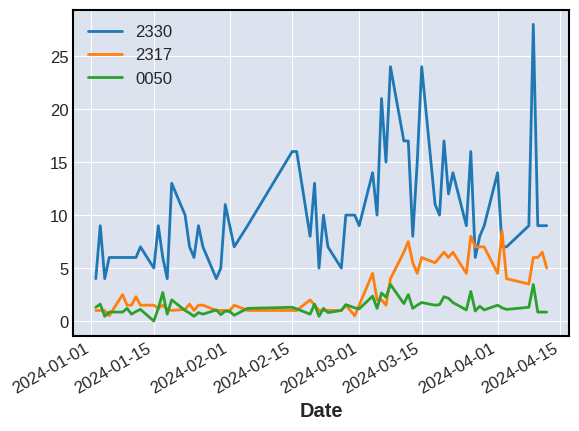

In [37]:
#每日波動
df_2330['High-Low'] = df_2330['High'] - df_2330['Low']
df_2317['High-Low'] = df_2317['High'] - df_2317['Low']
df_0050['High-Low'] = df_0050['High'] - df_0050['Low']



fig = plt.figure()
df_2330['High-Low'].plot(label="2330")
df_2317['High-Low'].plot(label="2317")
df_0050['High-Low'].plot(label="0050")

plt.legend()

### 比較台積電(2330)和鴻海(2317)的收益率關係，使用閃點圖

In [40]:
import yfinance as yf

start = datetime.datetime(2020, 1, 1)
campany=['2330.TW','2317.TW']
df_stock = yf.download(campany, start=start)
df_stock.tail()

[*********************100%%**********************]  2 of 2 completed


Price      Adj Close           Close            High             Low          \
Ticker       2317.TW 2330.TW 2317.TW 2330.TW 2317.TW 2330.TW 2317.TW 2330.TW   
Date                                                                           
2024-05-06     167.5   786.0   167.5   786.0   168.5   793.0   161.0   786.0   
2024-05-07     169.5   800.0   169.5   800.0   171.0   800.0   166.5   792.0   
2024-05-08     169.5   802.0   169.5   802.0   171.5   802.0   168.0   792.0   
2024-05-09     170.5   796.0   170.5   796.0   175.0   802.0   169.5   796.0   
2024-05-10     169.5   802.0   169.5   802.0   172.0   807.0   167.0   798.0   

Price         Open             Volume            
Ticker     2317.TW 2330.TW    2317.TW   2330.TW  
Date                                             
2024-05-06   161.5   791.0  177370587  32599878  
2024-05-07   169.5   797.0  124701709  33890214  
2024-05-08   168.5   794.0   75120589  21757193  
2024-05-09   169.5   798.0  113944686  21923999  
2024-05-10   171.5   803.0   84399408  25101318

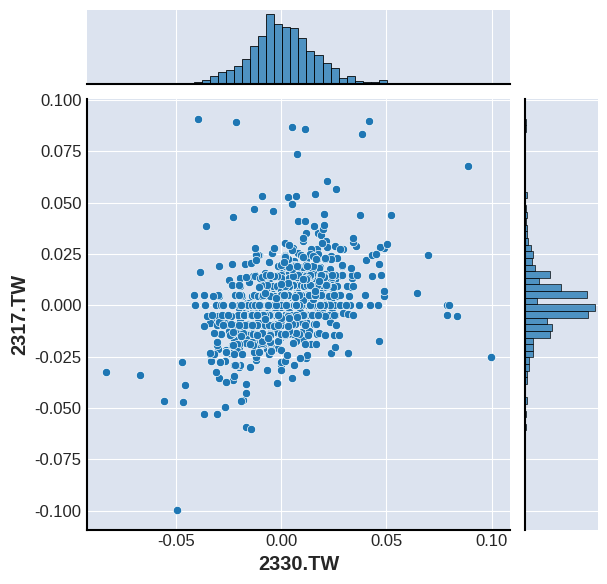

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# 計算每個股票的百分比變化
adjClose_pct = df_stock['Adj Close'].pct_change()

# 確保 matplotlib 正確處理負號
plt.rcParams['axes.unicode_minus'] = False

# 使用 Seaborn 的 jointplot 繪製散點圖
sns.jointplot(x='2330.TW', y='2317.TW', data=adjClose_pct, kind="scatter")
plt.show()


其中x軸是第一個參數，y軸是第二個參數，這張圖表傳達的訊息

- 當x和y的座標都小於0，代表那天1和2都是跌，大於0則漲
- 當x和y的值越相近時，則閃點圖會越趨向一直線。代表兩個股票越正相關

### 比較台積電(2330)和鴻海(2317)的收益率關係，使用線性回歸


<Axes: xlabel='2330.TW', ylabel='2317.TW'>

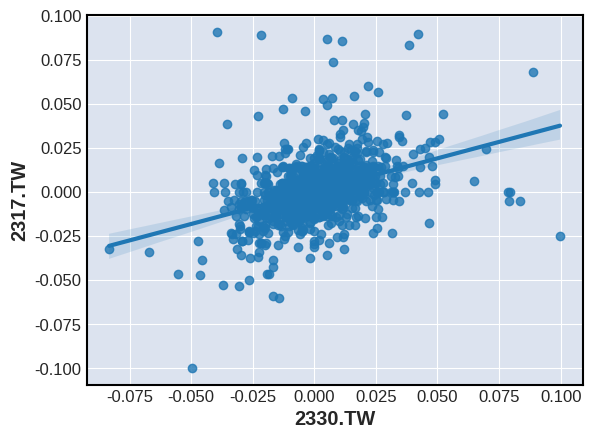

In [42]:
sns.regplot(x='2330.TW', y='2317.TW', data=adjClose_pct)

###  比較多家收益率關係

In [43]:
import yfinance as yf

start = datetime.datetime(2020, 1, 1)
campany=['2330.TW', '0050.TW', '2317.TW', '3008.TW']
df_stock = yf.download(campany, start=start)

[*********************100%%**********************]  4 of 4 completed


In [44]:
adjClose = df_stock['Adj Close']
plt.rcParams['axes.unicode_minus']=False
adjClose_pct = adjClose.pct_change()

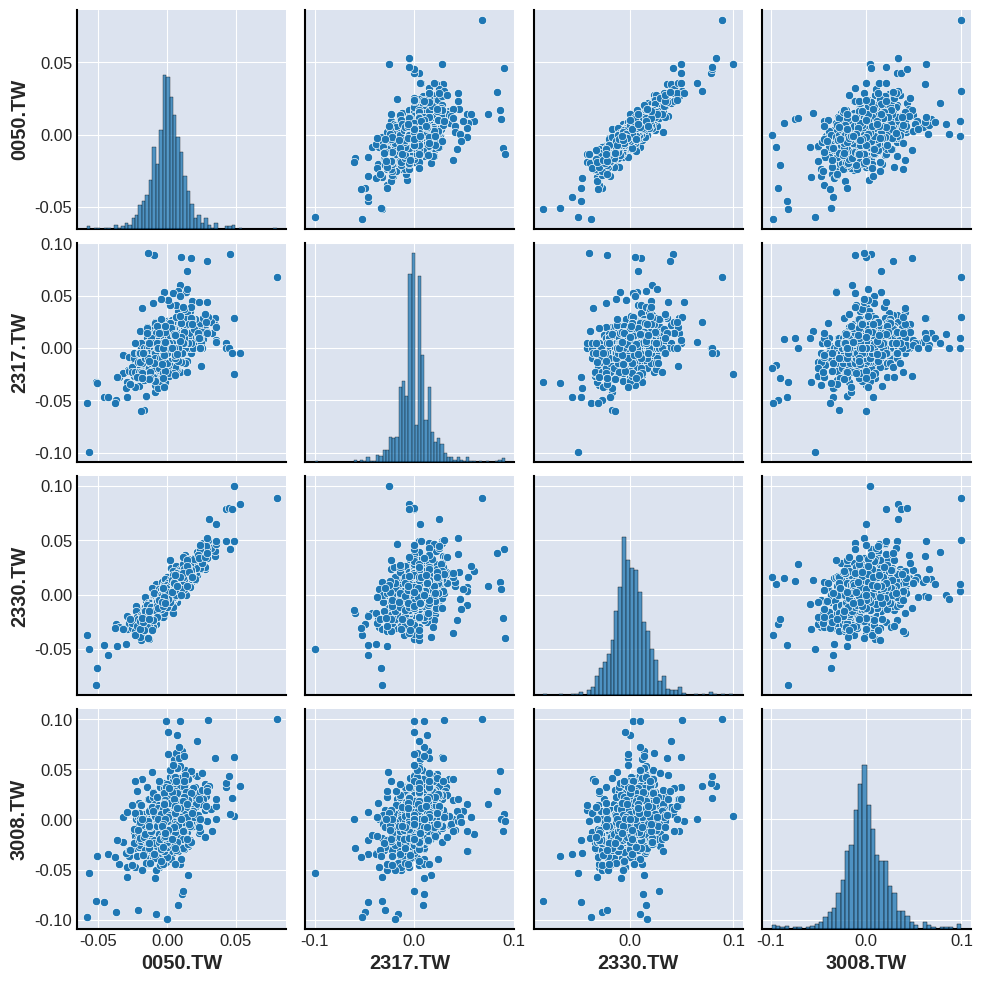

In [45]:
sns.pairplot(adjClose_pct.dropna())

## 用 Python twstock 抓台灣股價

In [ ]:
!pip install twstock

In [ ]:
import twstock
twstock.codes

In [49]:
twstock.codes['2330']

StockCodeInfo(type='股票', code='2330', name='台積電', ISIN='TW0002330008', start='1994/09/05', market='上市', group='半導體業', CFI='ESVUFR')

###  twstock.Stock()
- 抓取的股票的歷史資料

In [50]:
# 抓取歷史資料
stock_0050 = twstock.Stock('0050')

In [51]:
stock_0050.close[-5:] # 近5交易日之收盤價

[159.2, 160.1, 160.7, 160.5, 161.65]

### twstock.fetch()
- 如果要抓取超過31天的資料可以使用fetch()

In [52]:
stock_0050 = stock_0050.fetch(2020,11)      # 獲取 2020 年 11 月之股票資料

In [ ]:
stock_0050

當然還可以使用取得從過去到現在的股價，下面示範從2018年01月到現在的資料，並且用開盤價和收盤價畫成圖表

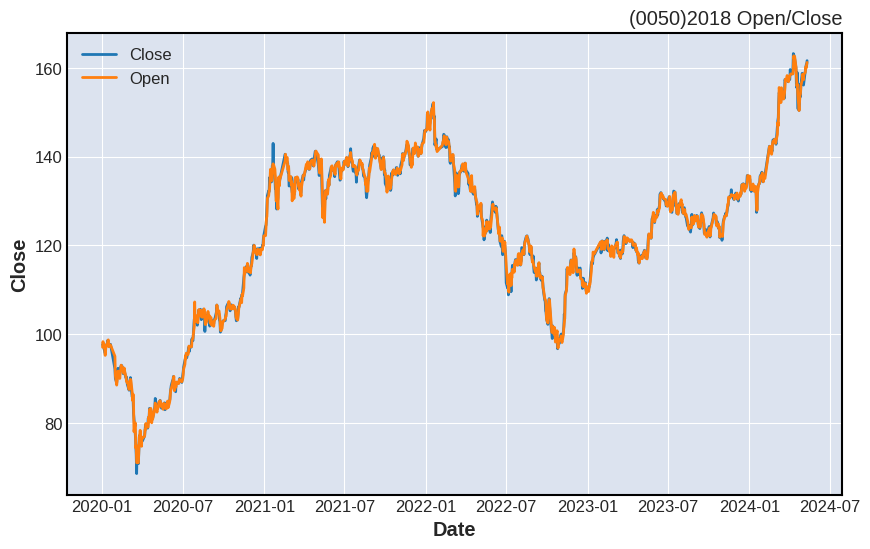

In [54]:
import matplotlib.pyplot as plt
import pandas as pd


stock_0050 = twstock.Stock('0050').fetch_from(2020,1)     # 獲取 2018 年 01 月至今日之股票資料
stock_0050_pd = pd.DataFrame(stock_0050)
stock_0050_pd = stock_0050_pd.set_index('date')


fig = plt.figure(figsize=(10, 6))
plt.plot(stock_0050_pd.close, '-' , label="Close")
plt.plot(stock_0050_pd.open, '-' , label="Open")
plt.title('(0050)2018 Open/Close',loc='right')
# loc->title的位置
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True, axis='y')
plt.legend()
fig.savefig('day20_01.png')

### realtime()
- 這個套件不只可以抓取歷史資料也可以抓取即時資料。
- 只會抓出一筆

In [ ]:
stock_0050_real = twstock.realtime.get('0050')
stock_0050_real

In [ ]:
# 抓取多個股票的方式
twstock.realtime.get(['2330', '2337', '2409'])

{'2330': {'timestamp': 1712903400.0,
  'info': {'code': '2330',
   'channel': '2330.tw',
   'name': '台積電',
   'fullname': '台灣積體電路製造股份有限公司',
   'time': '2024-04-12 06:30:00'},
  'realtime': {'latest_trade_price': '818.0000',
   'trade_volume': '5279',
   'accumulate_trade_volume': '31351',
   'best_bid_price': ['818.0000',
    '817.0000',
    '816.0000',
    '815.0000',
    '814.0000'],
   'best_bid_volume': ['466', '309', '327', '1142', '685'],
   'best_ask_price': ['819.0000',
    '820.0000',
    '821.0000',
    '822.0000',
    '823.0000'],
   'best_ask_volume': ['67', '272', '141', '172', '119'],
   'open': '823.0000',
   'high': '826.0000',
   'low': '817.0000'},
  'success': True},
 '2337': {'timestamp': 1712903400.0,
  'info': {'code': '2337',
   'channel': '2337.tw',
   'name': '旺宏',
   'fullname': '旺宏電子股份有限公司',
   'time': '2024-04-12 06:30:00'},
  'realtime': {'latest_trade_price': '26.9000',
   'trade_volume': '721',
   'accumulate_trade_volume': '8468',
   'best_bid_price': ['

## 繪製K線圖

- K線圖：根據股價一天走勢的 4 個價位：開盤價、收盤價、最高價、最低價繪製而成。開盤價與收盤價，會構成 K 線的實體（Body），最高價、最低價分別成為上影線（Shadow）及下影線。如果收盤價高於開盤價，Body 為紅色；收盤價低於開盤價，Body 為黑色或是綠色。




In [ ]:
#安裝相關套件
!pip install yfinance
!pip install mpl_finance

In [57]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'   #預設為PNG，放大會糊掉，使用此指令則改為向量圖svg，在瀏覽器放大檢視一樣清晰

[*********************100%%**********************]  1 of 1 completed
<ipython-input-81-787ca826665e>:32: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



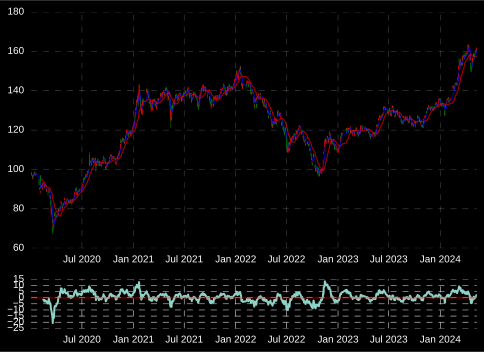

In [81]:
# Python 交易策略應用「KD」作為交易策略程式範例
import yfinance as yf
from mpl_finance import candlestick_ohlc
from matplotlib import pyplot as plt
from matplotlib import style

import matplotlib.dates as mdates
import datetime as dt
import pandas as pd
import numpy as np
import time

style.use('dark_background')

# yf.pdr_override()

fig = plt.figure()
ax1 = fig.add_subplot(111)
stock = "0050"
Analysis = 'stock0050TW.csv'
start = dt.datetime(2020, 1, 1)

df = yf.download(str(stock)+'.TW', start)
df.to_csv(Analysis)

time.sleep(2)

data = pd.read_csv(Analysis, parse_dates=True, index_col='Date')
data.head()


top = plt.subplot2grid((12, 9), (0, 0), rowspan=9, colspan=9)
bottom = plt.subplot2grid((12, 9), (10, 0), rowspan=2, colspan=9, sharex=top)


def bias(ma):
    data['MA25'] = data['Close'].rolling(window=ma).mean()
    data['BIAS'] = (data['Close'] - data['MA25']) / data['MA25'] * 100
    return data['BIAS']

bias = bias(25)

moving_avg = data["Close"].rolling(5).mean()
moving_avg20 = data["Close"].rolling(20).mean()

data = data.reset_index()
data['Date'] = data['Date'].apply(lambda d: mdates.date2num(d.to_pydatetime()))
candlestick = [tuple(x) for x in data[['Date', 'Open', 'High', 'Low', 'Close']].values]
candlestick_ohlc(top, candlestick, width=0.7, colorup='r', colordown='green', alpha=0.8)

top.plot(moving_avg, color='b', linewidth=1, alpha=0.7, label='MA5')
top.plot(moving_avg20, color='r', linewidth=1, alpha=0.7, label='MA20')
top.grid(which='both', alpha=0.3)

bottom.plot(bias)
bottom.axhline(0, color='r', alpha=0.3)

plt.savefig('stock_with_KD.pdf', bbox_inches='tight')  #輸出pdf
plt.show()

### 簡易交易策略

Python 的 `yfinance` 庫是一個非常實用的工具。以下是一個基於簡單移動平均線（Simple Moving Average, SMA）的交易策略，適用於台灣股市的0050.tw（元大台灣50）：

### 交易策略概念

1.  **使用兩個不同時間窗口的移動平均線**：短期移動平均線（如10天）和長期移動平均線（如50天）。這種方法通常被稱為“雙移動平均線交叉策略”。
2.  **買入信號**：當短期移動平均線由下向上穿越長期移動平均線時，視為買入信號。
3.  **賣出信號**：當短期移動平均線由上向下穿越長期移動平均線時，視為賣出信號。

### 實作步驟

1.  **數據獲取**：從Yahoo Finance獲取0050.tw的歷史股價數據。
2.  **計算移動平均線**：使用pandas計算10天和50天的SMA。
3.  **生成交易信號**：根據SMA交叉點生成買入和賣出信號。
4.  **繪製結果**：將股價與SMA線一起繪製出來，以視覺方式顯示買賣點。

實際交易時應考慮更多因素，如交易費用、滑價。


[*********************100%%**********************]  1 of 1 completed


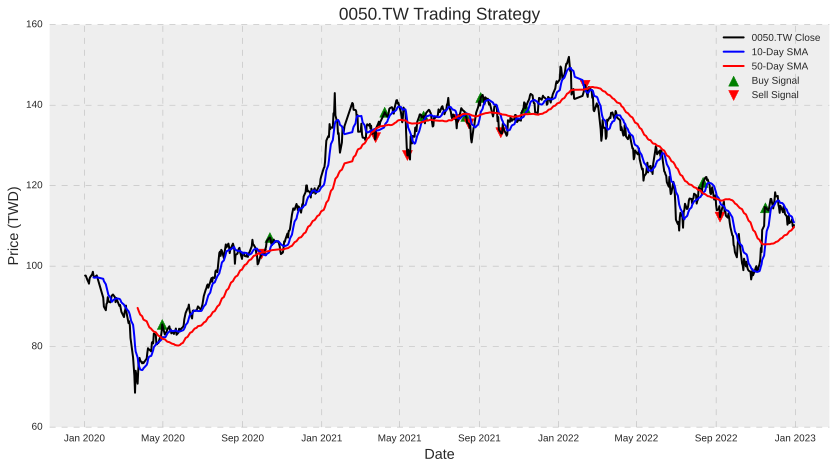

In [73]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('bmh')

# 數據獲取
data = yf.download('0050.TW', start='2020-01-01', end='2023-01-01')

# 計算短期和長期移動平均線
data['SMA10'] = data['Close'].rolling(window=10).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

# 生成交易信號
data['Buy_Signal'] = (data['SMA10'].shift(1) < data['SMA50'].shift(1)) & (data['SMA10'] > data['SMA50'])
data['Sell_Signal'] = (data['SMA10'].shift(1) > data['SMA50'].shift(1)) & (data['SMA10'] < data['SMA50'])

# 繪製股票價格與移動平均線
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='0050.TW Close', color = 'k')
plt.plot(data['SMA10'], label='10-Day SMA', color='blue')
plt.plot(data['SMA50'], label='50-Day SMA', color='red')

# 標記買入與賣出信號
plt.scatter(data.index[data['Buy_Signal']], data[data['Buy_Signal']]['Close'], label='Buy Signal', marker='^', color='green', s=100)
plt.scatter(data.index[data['Sell_Signal']], data[data['Sell_Signal']]['Close'], label='Sell Signal', marker='v', color='red', s=100)

plt.title('0050.TW Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price (TWD)')
plt.legend()
plt.show()



### 回測和報酬率計算步驟

1.  **初始化投資組合狀態**：跟踪持股狀態以及投資組合的價值變化。
2.  **模擬交易**：按照買入和賣出信號進行虛擬交易。
3.  **計算報酬率**：比較策略的最終價值與初始投入的變化。
4.  **評估表現**：根據獲得的報酬率和可能的最大回撤等指標評估策略表現。

說明

-   **交易模擬**：根據移動平均線的交叉情況設定持倉狀態（1為持有，0為空倉），並計算基於此持倉狀態的每日回報。
-   **累積回報**：通過計算每日回報的累積產品來評估市場和策略的表現。
-   **總報酬率和年化報酬率**：這兩個指標可以幫助評估策略在整個回測期間的總體表現以及調整為年化表現的情況。

這段代碼將生成一張圖表，展示市場與策略的累積回報對比，並輸出總報酬率和年化報酬率。這有助於評估策略在選定時期內的表現效果。

[*********************100%%**********************]  1 of 1 completed


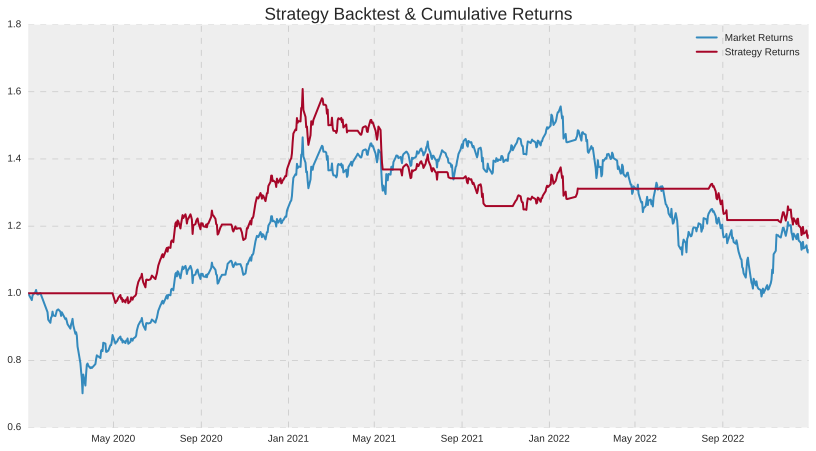

Total Strategy Return: 17.22%
Annualized Strategy Return: -58.31%


In [74]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 數據獲取
data = yf.download('0050.TW', start='2020-01-01', end='2023-01-01')

# 計算短期和長期移動平均線
data['SMA10'] = data['Close'].rolling(window=10).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

# 生成交易信號
data['Position'] = 0
data['Position'] = data.apply(lambda row: 1 if row['SMA10'] > row['SMA50'] else 0, axis=1)
data['Position'] = data['Position'].shift(1)

# 計算日常回報
data['Market Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position']

# 繪製策略累積回報
data['Cumulative Market Returns'] = (1 + data['Market Return']).cumprod()
data['Cumulative Strategy Returns'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14,7))
plt.plot(data['Cumulative Market Returns'], label='Market Returns')
plt.plot(data['Cumulative Strategy Returns'], label='Strategy Returns')
plt.legend()
plt.title('Strategy Backtest & Cumulative Returns')
plt.show()

# 計算總報酬率和年化報酬率
total_strategy_return = data['Cumulative Strategy Returns'].iloc[-1] - 1
annualized_strategy_return = total_strategy_return ** (365 / len(data)) - 1

print(f"Total Strategy Return: {total_strategy_return*100:.2f}%")
print(f"Annualized Strategy Return: {annualized_strategy_return*100:.2f}%")


### 改以KD值<20買進、>80賣出的策略

使用KD指標（K值和D值）來制定交易策略是一種流行的技術分析方法，尤其在股票交易中。K值和D值是隨機振盪指數（Stochastic Oscillator）的兩個主要組成部分，用於識別股票的超買和超賣條件。根據您的要求，我們可以設計一個簡單的策略，當KD值低於20時買進，超過80時賣出。

### 交易策略步驟

1.  **計算K值和D值**：使用典型的14天周期計算隨機振盪指標。
2.  **買進信號**：當K值和D值同時小於20時，視為股票處於超賣狀態，發出買進信號。
3.  **賣出信號**：當K值和D值同時大於80時，視為股票處於超買狀態，發出賣出信號。
4.  **回測策略**：根據買進和賣出信號進行交易模擬，計算策略的總報酬率和年化報酬率。

注意事項

-   **初始化K值和D值**：KD指數的計算可能需要一定的初始數據，因此策略的開始階段可能無法即時交易。
-   **交易信號遲滯**：由於使用的是滾動窗口計算，買賣信號可能會有一定的遲滯。
-   **交易成本和滑點**：在實際運用這類策略時，需要考慮交易成本和滑點影響。



[*********************100%%**********************]  1 of 1 completed


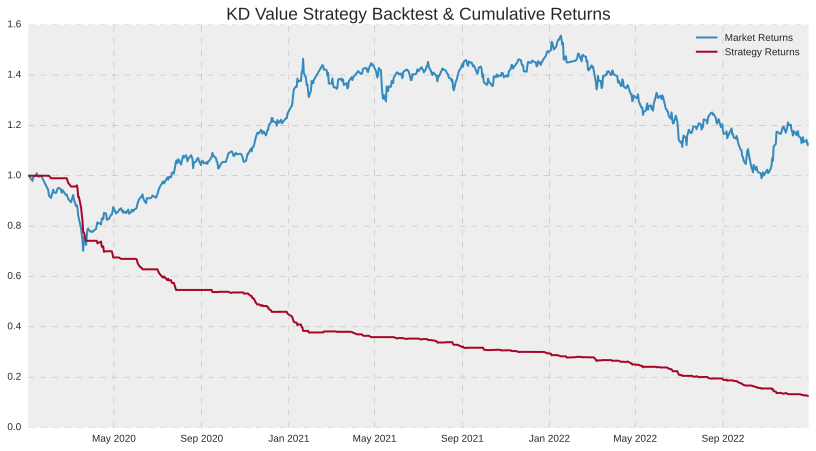

Total Strategy Return: -87.45%
Annualized Strategy Return: nan%


<ipython-input-75-1493032853d5>:39: RuntimeWarning:

invalid value encountered in scalar power



In [75]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 數據獲取
data = yf.download('0050.TW', start='2020-01-01', end='2023-01-01')

# 計算KD值
low_min  = data['Low'].rolling(window=14).min()
high_max = data['High'].rolling(window=14).max()

# 计算%K
data['%K'] = (data['Close'] - low_min)*100 / (high_max - low_min)
data['%D'] = data['%K'].rolling(window=3).mean()

# 買賣信號
data['Buy_Signal'] = ((data['%K'] < 20) & (data['%D'] < 20))
data['Sell_Signal'] = ((data['%K'] > 80) & (data['%D'] > 80))

# 計算策略回報
data['Market Return'] = data['Close'].pct_change()
data['Strategy Return'] = 0
data.loc[data['Buy_Signal'], 'Strategy Return'] = data['Market Return']
data.loc[data['Sell_Signal'], 'Strategy Return'] = -data['Market Return']

# 累積回報
data['Cumulative Market Returns'] = (1 + data['Market Return']).cumprod()
data['Cumulative Strategy Returns'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14,7))
plt.plot(data['Cumulative Market Returns'], label='Market Returns')
plt.plot(data['Cumulative Strategy Returns'], label='Strategy Returns')
plt.legend()
plt.title('KD Value Strategy Backtest & Cumulative Returns')
plt.show()

# 計算總報酬率和年化報酬率
total_strategy_return = data['Cumulative Strategy Returns'].iloc[-1] - 1
annualized_strategy_return = total_strategy_return ** (365 / len(data)) - 1

print(f"Total Strategy Return: {total_strategy_return*100:.2f}%")
print(f"Annualized Strategy Return: {annualized_strategy_return*100:.2f}%")


### 如何評估一個不錯的交易策略

評估一個交易策略是否優秀，需要考慮多個因素，這些因素包括策略的收益性、風險管理、可執行性和適應性等。

### 1\. 收益率和風險評估

-   **總報酬率和年化報酬率**：衡量策略在特定時期內的表現強度。
-   **夏普比率**：評估每承受一單位總風險所獲得的超額回報，是衡量風險調整後收益的重要指標。
-   **最大回撤**：策略可能遭遇的最大資本損失，是評估策略風險程度的一個重要指標。

### 2\. 穩定性和一致性

-   **勝率**：交易獲利次數與總交易次數的比例。
-   **損益比**：平均獲利交易與平均虧損交易的比例。
-   **回撤期間**：策略從最高點到回復原高點所需的時間長度。

### 3\. 適應市場變化的能力

-   **參數最適化和穩健性測試**：檢查策略在不同市場條件下的表現以確保其適應性。
-   **前瞻性測試**：在實際市場環境中，使用策略未見過的數據進行測試，以評估其真實世界的有效性。

### 4\. 實用性和可執行性

-   **交易頻率**：根據交易頻率，確定是否能實時執行所有交易信號。
-   **交易成本考慮**：計算交易成本（包括滑點和手續費）對策略的總收益影響。

### 舉例:0050策略描述

1.  **移動平均線（MA）**：使用快速（10日）和慢速（50日）移動平均線。當快速MA由下往上穿越慢速MA時，視為買入信號；反之，由上往下穿越時視為賣出信號。
2.  **相對強弱指數（RSI）**：測量股票超買或超賣的狀況。RSI低於30通常表示超賣，RSI高於70則表示超買。我們將使用RSI來過濾MA的信號，確保在超賣時買入，在超買時賣出。
3.  **成交量**：成交量增加確認趨勢的強度。只有在成交量確認下，我們才考慮執行MA和RSI指出的買賣信號。

在實際應用之前，這個策略應該進行以下評估：

-   **回測其在不同市場條件下的表現**：觀察不同市場周期（牛市、熊市、波動期）中的策略表現。
-   **計算夏普比率、最大回撤和其他風險管理指標**：這些將幫助了解策略的風險調整後回報。
-   **前瞻性測試**：在模擬交易環境中應用策略，以確認其在現實條件下的有效性。

通過這樣的綜合評估，我們能夠更好地理解策略在現實交易中的潛在效益和風險。



[*********************100%%**********************]  1 of 1 completed


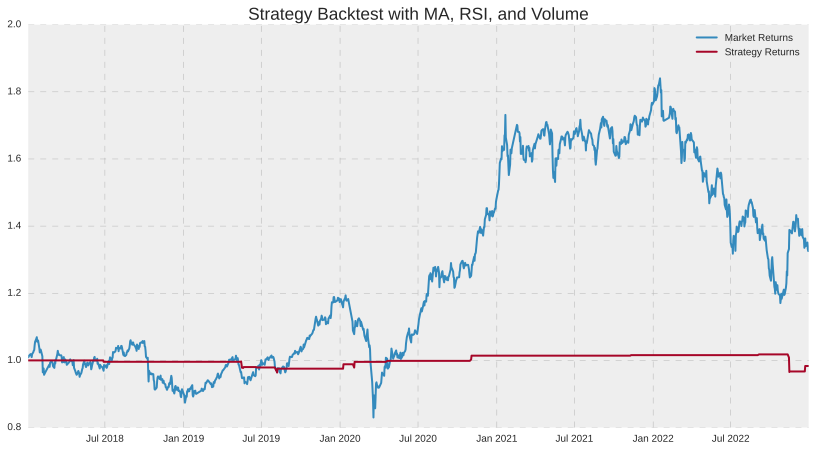

In [76]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 數據獲取
data = yf.download('0050.TW', start='2018-01-01', end='2023-01-01')

# 計算移動平均線
data['SMA10'] = data['Close'].rolling(window=10).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

# 計算RSI
delta = data['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
roll_up = up.rolling(window=14).mean()
roll_down = down.rolling(window=14).mean()
RS = roll_up / roll_down
data['RSI'] = 100.0 - (100.0 / (1.0 + RS))

# 成交量平均
data['Volume_avg'] = data['Volume'].rolling(window=20).mean()

# 生成交易信號
data['Buy'] = ((data['SMA10'] > data['SMA50']) & (data['RSI'] < 30) & (data['Volume'] > data['Volume_avg']))
data['Sell'] = ((data['SMA10'] < data['SMA50']) & (data['RSI'] > 70) & (data['Volume'] > data['Volume_avg']))

# 計算日常回報和策略回報
data['Returns'] = data['Close'].pct_change()
data['Strategy'] = data['Returns'] * (data['Buy'].astype(int) - data['Sell'].astype(int)).shift()

# 累積回報
data['Cumulative Market Returns'] = (1 + data['Returns']).cumprod()
data['Cumulative Strategy Returns'] = (1 + data['Strategy']).cumprod()

# 繪圖
plt.figure(figsize=(14,7))
plt.plot(data['Cumulative Market Returns'], label='Market Returns')
plt.plot(data['Cumulative Strategy Returns'], label='Strategy Returns')
plt.title('Strategy Backtest with MA, RSI, and Volume')
plt.legend()
plt.show()


### 用機器學習方法改寫策略

以下是一個利用機器學習（特別是隨機森林分類器）來進行股票交易的基本框架。這種策略可以從技術指標中學習並預測何時買入或賣出股票。

### 機器學習交易策略步驟

1.  **數據預處理**：整合並處理股票數據，生成用於訓練的特徵和標籤。
2.  **特徵工程**：選擇合適的技術指標作為特徵。
3.  **模型訓練**：使用這些特徵訓練機器學習模型。
4.  **策略實施**：根據模型預測來執行交易。


這個機器學習模型會學習股票的歷史價格、技術指標和成交量，並嘗試預測股票在未來五天內是否會上漲。根據模型的預測來執行買入或賣出操作。使用隨機森林的原因是它在金融市場預測中表現出了良好的泛化能力和對非線性關係的捕捉能力。

這只是一個基礎示例，實際應用時可能需要進一步的參數調整、特徵工程和模型優化。此外，考慮到交易成本和滑點對實際交易效果的影響也很重要。

[*********************100%%**********************]  1 of 1 completed


              precision    recall  f1-score   support

           0       0.75      0.72      0.74       178
           1       0.77      0.79      0.78       203

    accuracy                           0.76       381
   macro avg       0.76      0.76      0.76       381
weighted avg       0.76      0.76      0.76       381



<ipython-input-77-c17925c1244f>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-c17925c1244f>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-c17925c1244f>:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-c179

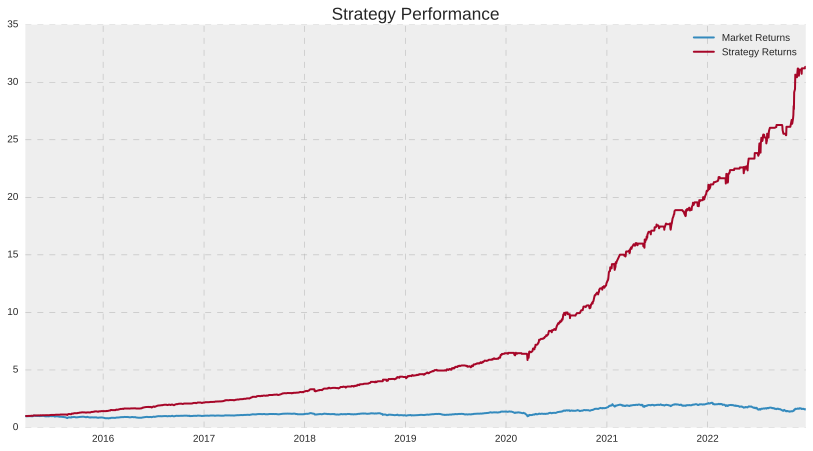

In [77]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 數據獲取
data = yf.download('0050.TW', start='2015-01-01', end='2023-01-01')

# 計算技術指標
data['SMA10'] = data['Close'].rolling(window=10).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['RSI'] = data['Close'].pct_change().rolling(window=14).apply(lambda x: np.sum(np.where(x>0, x, 0)) / np.sum(np.abs(x)) * 100)

# 創建標籤：未來5天收盤價比當天上漲為1，否則為0
data['Future Close'] = data['Close'].shift(-5)
data['Label'] = (data['Future Close'] > data['Close']).astype(int)

# 清除含NaN值的行
data = data.dropna()

# 特徵和標籤
features = data[['SMA10', 'SMA50', 'RSI', 'Volume']]
labels = data['Label']

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# 模型訓練
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# 模型評估
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# 模擬交易策略
data['Predicted Signal'] = model.predict(features)
data['Market Returns'] = data['Close'].pct_change()
data['Strategy Returns'] = data['Market Returns'] * data['Predicted Signal'].shift(1)

# 計算累積回報
data['Cumulative Market Returns'] = (1 + data['Market Returns']).cumprod()
data['Cumulative Strategy Returns'] = (1 + data['Strategy Returns']).cumprod()

# 繪圖
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(data['Cumulative Market Returns'], label='Market Returns')
plt.plot(data['Cumulative Strategy Returns'], label='Strategy Returns')
plt.title('Strategy Performance')
plt.legend()
plt.show()


標示進場時機，以及策略需要的相關資訊
1.  **進場時機**：模型預測為上漲（1）時，即為買入信號。
2.  **出場時機**：模型預測為下跌（0）時，即為賣出信號。
3.  **模型訓練和評估**：使用隨機森林模型，訓練集和測試集的分割比例為80%和20%。
4.  **技術指標**：使用了10日和50日簡單移動平均線、14日RSI和成交量作為特徵。
5.  **標籤生成**：未來五天的收盤價高於當天收盤價視為正標籤（1），否則為負標籤（0）。


[*********************100%%**********************]  1 of 1 completed


              precision    recall  f1-score   support

           0       0.75      0.72      0.74       178
           1       0.77      0.79      0.78       203

    accuracy                           0.76       381
   macro avg       0.76      0.76      0.76       381
weighted avg       0.76      0.76      0.76       381



<ipython-input-78-3b1154c33d9b>:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-3b1154c33d9b>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-3b1154c33d9b>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-3b11

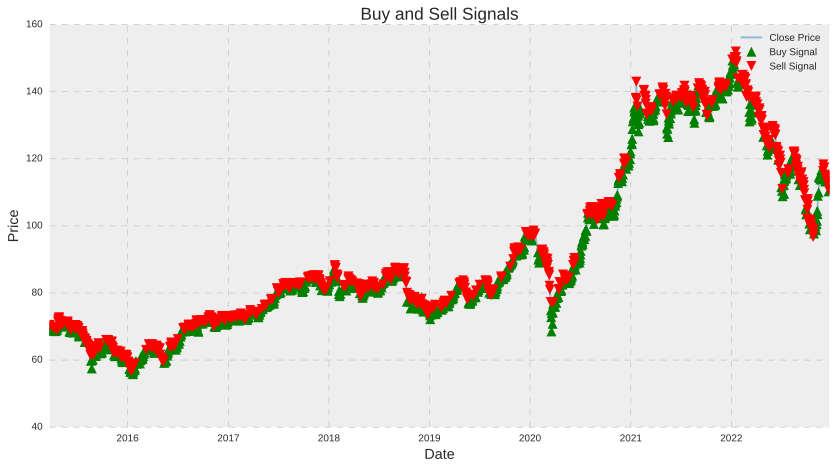

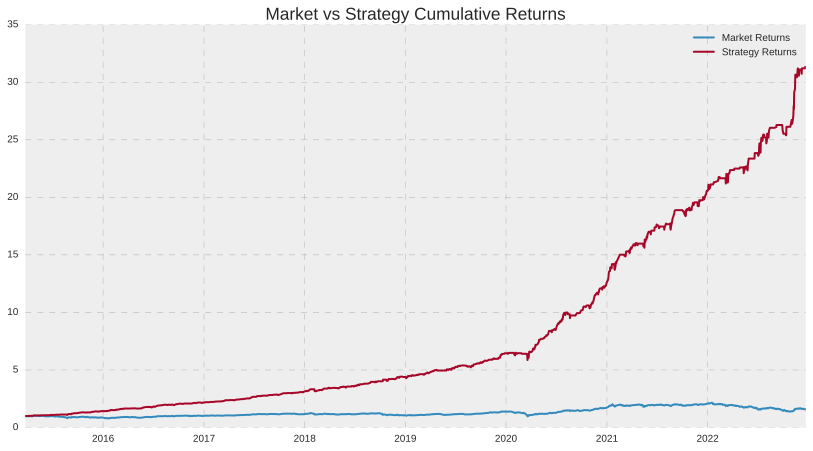

In [78]:
# @title
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 數據獲取
data = yf.download('0050.TW', start='2015-01-01', end='2023-01-01')

# 計算技術指標
data['SMA10'] = data['Close'].rolling(window=10).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['RSI'] = data['Close'].pct_change().rolling(window=14).apply(lambda x: np.sum(np.where(x>0, x, 0)) / np.sum(np.abs(x)) * 100)

# 創建標籤
data['Future Close'] = data['Close'].shift(-5)
data['Label'] = (data['Future Close'] > data['Close']).astype(int)

# 清除含NaN值的行
data = data.dropna()

# 特徵和標籤
features = data[['SMA10', 'SMA50', 'RSI', 'Volume']]
labels = data['Label']

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# 模型訓練
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# 模型評估
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# 策略實施
data['Predicted Signal'] = model.predict(features)
data['Market Returns'] = data['Close'].pct_change()
data['Strategy Returns'] = data['Market Returns'] * data['Predicted Signal'].shift(1)

# 標記進場和出場點
data['Buy'] = data['Predicted Signal'] == 1
data['Sell'] = data['Predicted Signal'] == 0

# 累積回報
data['Cumulative Market Returns'] = (1 + data['Market Returns']).cumprod()
data['Cumulative Strategy Returns'] = (1 + data['Strategy Returns']).cumprod()

# 繪圖顯示進場和出場
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data.loc[data['Buy'], 'Close'], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data.loc[data['Sell'], 'Close'], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 繪圖策略累積回報
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Market Returns'], label='Market Returns')
plt.plot(data['Cumulative Strategy Returns'], label='Strategy Returns')
plt.title('Market vs Strategy Cumulative Returns')
plt.legend()
plt.show()


#### 改以mpl_finance繪製



In [ ]:
!pip install mplfinance

[*********************100%%**********************]  1 of 1 completed
<ipython-input-14-ad93735525e9>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted Signal'] = model.predict(features)
<ipython-input-14-ad93735525e9>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy'] = data['Predicted Signal'] == 1
<ipython-input-14-ad93735525e9>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


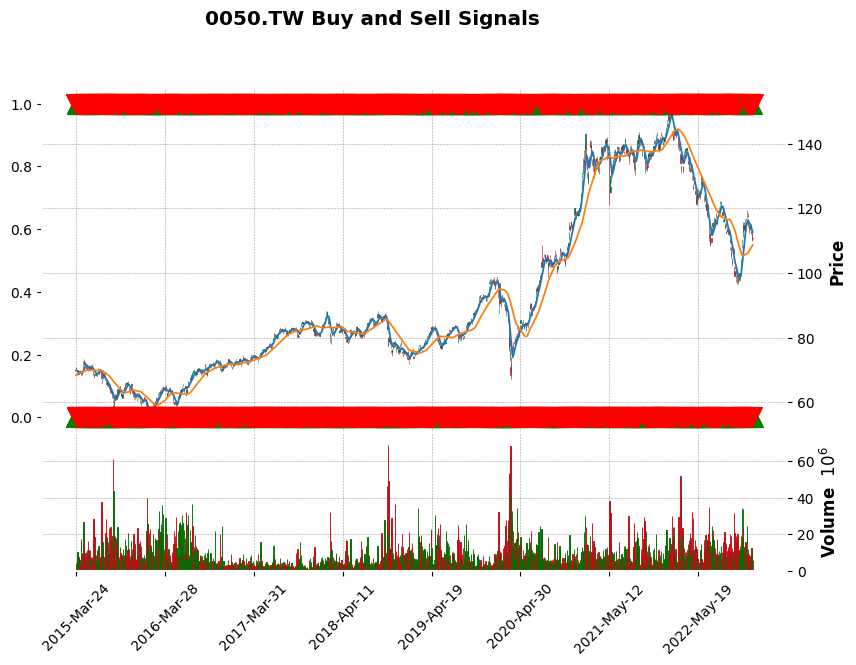

In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import mplfinance as mpf

# 數據獲取
data = yf.download('0050.TW', start='2015-01-01', end='2023-01-01')

# 計算技術指標
data['SMA10'] = data['Close'].rolling(window=10).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['RSI'] = data['Close'].pct_change().rolling(window=14).apply(lambda x: np.sum(np.where(x>0, x, 0)) / np.sum(np.abs(x)) * 100)

# 創建標籤
data['Future Close'] = data['Close'].shift(-5)
data['Label'] = (data['Future Close'] > data['Close']).astype(int)

# 清除含NaN值的行
data = data.dropna()

# 特徵和標籤
features = data[['SMA10', 'SMA50', 'RSI', 'Volume']]
labels = data['Label']

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# 模型訓練
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# 模型評估
predictions = model.predict(X_test)

# 策略實施
data['Predicted Signal'] = model.predict(features)
data['Buy'] = data['Predicted Signal'] == 1
data['Sell'] = data['Predicted Signal'] == 0

# 為mplfinance創建額外的列
apdict = mpf.make_addplot(data[['SMA10', 'SMA50']], secondary_y=False)
add_buy = mpf.make_addplot(data['Buy'], type='scatter', markersize=200, marker='^', panel=0, color='g')
add_sell = mpf.make_addplot(data['Sell'], type='scatter', markersize=200, marker='v', panel=0, color='r')

# 繪製蠟燭圖
mpf.plot(data, type='candle', style='charles', title='0050.TW Buy and Sell Signals',
         addplot=[apdict, add_buy, add_sell], volume=True, figratio=(12,8), figscale=1.2)


#### 改用ploty繪製



In [15]:
!pip install plotly


In [82]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 下載和準備數據
data = yf.download('0050.TW', start='2015-01-01', end='2023-01-01')
data['SMA10'] = data['Close'].rolling(window=10).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['RSI'] = data['Close'].diff().apply(lambda x: max(x, 0)).rolling(window=14).mean() / data['Close'].diff().abs().rolling(window=14).mean() * 100
data['Future Close'] = data['Close'].shift(-5)
data['Label'] = (data['Future Close'] > data['Close']).astype(int)
data.dropna(inplace=True)

# 特徵和標籤
features = data[['SMA10', 'SMA50', 'RSI', 'Volume']]
labels = data['Label']

# 模型訓練
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
data['Predicted Signal'] = model.predict(features)

# 繪製蠟燭圖
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Close'],
                name='Candlestick')])

# 加入買賣信號
fig.add_trace(go.Scatter(x=data[data['Predicted Signal'] == 1].index,
                         y=data[data['Predicted Signal'] == 1]['Close'],
                         mode='markers', name='Buy Signal',
                         marker=dict(color='Green', size=10, symbol='triangle-up')))

fig.add_trace(go.Scatter(x=data[data['Predicted Signal'] == 0].index,
                         y=data[data['Predicted Signal'] == 0]['Close'],
                         mode='markers', name='Sell Signal',
                         marker=dict(color='Red', size=10, symbol='triangle-down')))

# 加入移動平均線
fig.add_trace(go.Scatter(x=data.index, y=data['SMA10'], mode='lines', name='SMA 10', line=dict(color='blue', width=1.5)))
fig.add_trace(go.Scatter(x=data.index, y=data['SMA50'], mode='lines', name='SMA 50', line=dict(color='orange', width=1.5)))

# 更新佈局
fig.update_layout(title='0050.TW Trading Strategy with Buy/Sell Signals',
                  xaxis_title='Date', yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

fig.show()


[*********************100%%**********************]  1 of 1 completed


### reference

- [python 入門到分析股市](https://ithelp.ithome.com.tw/users/20111390/ironman/1791)
- [ChatGPT](https://chat.openai.com/share/c7157c59-6d61-408e-b094-a9d7f11b39b5)